# Star Wars Surveys Guided Project

In this project, I'll work with Jupyter notebook and analyze data on the Star Wars movies. When I'm finished, you'll have a notebook you can either add to your portfolio or expand on your own.

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](https://abcnews.go.com/538) became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

For this project, I'll clean and explore the dataset in Jupyter notebook.


The following code reads the data into a pandas DataFrame:

`
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
`

We need to specify an `encoding`, because the dataset has some characters that aren't in Python's default `utf-8` encoding. You can read more about character encodings [on developer Joel Spolsky's blog](https://www.joelonsoftware.com/2003/10/08/the-absolute-minimum-every-software-developer-absolutely-positively-must-know-about-unicode-and-character-sets-no-excuses/).

### Instructions

1. Read the dataset into a DataFrame.
2. Explore the data by entering star_wars.head(10). Look for any strange values in the columns and rows.
3. Review the column names with star_wars.columns

In [1]:
# Read dataset into a DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
# Explore star_wars dataset
print(star_wars.head(10))

print(star_wars.isnull().sum())

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                                Yes             
1    3292879538                                                 No             
2    3292765271                                                Yes             
3    3292763116                                                Yes             
4    3292731220                                                Yes             
5    3292719380                                                Yes             
6    3292684787                                                Yes             
7    3292663732                                                Yes             
8    3292654043                                                Yes             
9    3292640424                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [3]:
# Review column names
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

# Cleaning and Mapping Yes/No Columns

Take a look at the next two columns:

* `Have you seen any of the 6 films in the Star Wars franchise?`
* `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both represent `Yes/No` questions. They can also be `NaN` where a respondent chooses not to answer a question. We can use the [pandas.Series.value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) method on a series to see all of the unique values in a column, along with the total number of times each value appears.

Both columns are currently string types, because the main values they contain are `Yes` and `No`. We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison.

We can use the [pandas.Series.map()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) method on series objects to perform the conversion.

For example, imagine we have a series that looks like this:

`
series = ["Yes", "No", NaN, "Yes"]
`

We can use a dictionary to define a mapping from each value in `series` to a new value:

`
yes_no = {
    "Yes": True,
    "No": False
}
`

Then, we can call the map() function to perform the mapping:

`
series = series.map(yes_no)
`

`series` will look like this:

`
[True, False, NaN, True]
`

### Instructions

1. Convert the `Have you seen any of the 6 films in the Star Wars franchise?` column to the Boolean type.
2. Convert the `Do you consider yourself to be a fan of the Star Wars film franchise?` column to the Boolean type.
3. When you're finished, both columns should only contain the value `True`, `False`, or `NaN`.

In [4]:
# Convert first two columns into Boolean type
yes_no = {"Yes": True, "No": False
}

In [5]:
for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
]:
    star_wars[col]= star_wars[col].map(yes_no)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply`.

The columns for this question are:

* `Which of the following Star Wars films have you seen? Please select all that apply`. — whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
* `Unnamed: 4` — whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.
* `Unnamed: 5` — whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.
* `Unnamed: 6` — whether or not the respondent saw `Star Wars: Episode IV A New Hope`.
* `Unnamed: 7` — whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.
* `Unnamed: 8` — whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and `NaN` in the mapping dictionary.

For example, imagine we had this column series:

`
["Star Wars: Episode I  The Phantom Menace", NaN, "Star Wars: Episode I  The Phantom Menace"]
`

We could convert the values using this mapping dictionary:

`
{
    "Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False
}
`

After calling the `map()` method on a series, the column should only contain the values `True` and `False`.

Next, we'll need to rename the columns to reflect what they represent. We can use the [pandas.DataFrame.rename()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) method on DataFrames to do this.

The `df.rename()` method works a lot like `map()`. We pass it a dictionary that maps the current column names to new ones:

`
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1"
})
`

The `pandas.DataFrame.rename()` method only renames the columns we specify in the dictionary; it won't change the names of other columns. The code above renames the `Which of the following Star Wars films have you seen? Please select all that apply`. column to `seen_1`.

### Instructions

1. Convert each column above so that it only contains the values `True` and `False`.
    * You can select the column names quicker by entering `star_wars.columns[3:9]`, rather than typing them out.
    * Be very careful with spacing when constructing your mapping dictionary! In the cells, `Star Wars: Episode I The Phantom Menace` has two spaces between the end of `Episode I` and the start of `The Phantom`, but this isn't the case in `Star Wars: Episode VI Return of the Jedi`. Check the values in the cells carefully to make sure you use the appropriate spacing.
2. Rename each of the columns above so the names are more intuitive. We recommend using `seen_1` to indicate whether the respondent saw `Star Wars: Episode I The Phantom Menace`, `seen_2` for `Star Wars: Episode II Attack of the Clones`, and so on.
3. When you're finished, the columns should have intuitive names, along with `True` and `False` values that indicate whether the respondent saw each of the six Star Wars movies.

In [6]:
# Create Boolean dictionary
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

In [7]:
# Create Boolean types
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [8]:
# Use pandas.dataframe.rename() to rename the columns
star_wars = star_wars.rename(
    columns={ 
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
    })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Cleaning the Ranking Columns

The next six columns ask the respondent to rank the *Star Wars* movies in order from least to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

* `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
* `Unnamed: 10` — How much the respondent liked `Star Wars: Episode II Attack of the Clones`
* `Unnamed: 11` — How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
* `Unnamed: 12` — How much the respondent liked `Star Wars: Episode IV A New Hope`
* `Unnamed: 13` — How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
* `Unnamed: 14` — How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

Fortunately, these columns don't require much cleaning. We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

We can do the numeric conversion with the [pandas.DataFrame.astype()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) method on DataFrames. In this case, we can use code that looks like this:

`
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
`

The code above converts column 9 up to but not including column 15 to the float data type.

### Instructions

1. Convert each of the columns above to a `float` type.
    * You can select all of the column names with `star_wars.columns[9:15]`, rather than typing each one in.
2. Give each column a more descriptive name. We suggest `ranking_1`, `ranking_2`, and so on.
    * You can use the `df.rename()` method from the previous screen to accomplish this.

In [9]:
# Convert each column to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [10]:
# Rename each column
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
})

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Finding the Highest-Ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie quicker. To do this, take the mean of each ranking columns using the [pandas.DataFrame.mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) method on DataFrames.

### Instructions

1. Use the `pandas.DataFrame.mean()` method to compute the mean of each `ranking` columns from the previous screen.
2. Make a bar chart of each column. You can use a matplotlib [bar chart](https://matplotlib.org/2.0.2/examples/api/barchart_demo.html) for this.
    * Run `%matplotlib inline` beforehand to show your plots in the notebook.
3. Write up a summary of what you've done so far in a markdown cell. Also discuss why you think the respondents ranked the movies the way they did.
    * Remember that a lower ranking is better.

In [11]:
# Use pandas.dataframe.mean() to compute mean of ranking columns
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

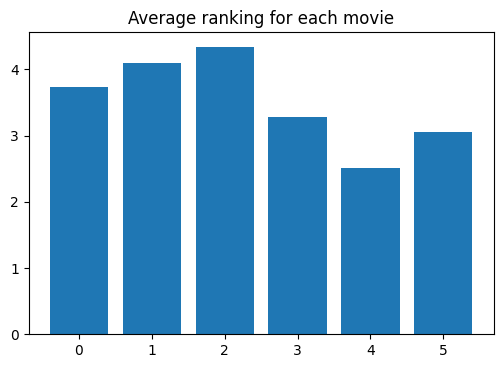

In [20]:
# Create matplotlib bar chart
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())
plt.title("Average ranking for each movie")
plt.show()

It looks like ranking 2 had to highest mean reanking, which is the worst movie; whereas, ranking 4 has the lowest mean ranking, which is the best movie. It looks like the last 3 movies have a lower ranking and are seen as better than the first 3 movies.

# Finding the Most Viewed Movie

Earlier in this project, we cleaned up the `seen` columns and converted their values to the Boolean type. When we call methods like [pandas.DataFrame.sum()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html) or `mean()`, they treat Booleans like integers. They consider `True` a `1` and `False` a `0`. That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

### Instructions

1. Use the `df.sum()` method to compute the sum of each `seen` columns.
2. Make a bar chart of each ranking. You can use a matplotlib bar chart for this.
3. Write up your thoughts on why the results look the way they do in a markdown cell. Also discuss how the results correlate with the rankings.

In [13]:
# Use df.sum() to compute the sums of the seen columns
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

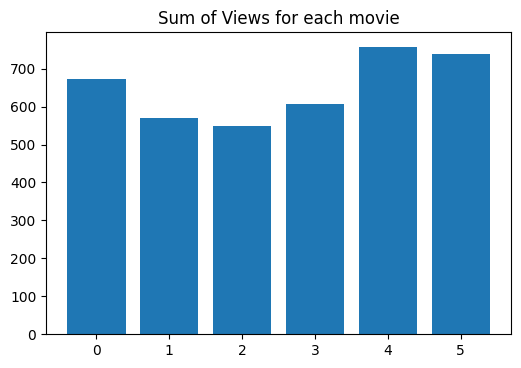

In [22]:
# Create a bar chart ranking
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())
plt. title("Sum of Views for each movie")
plt.show()

It looks like the fifth movie was the highest viewed movie of the first 6 Star Wars movies, closely followed by the 6th movie. The 3rd movie was the least viewed movie closely followed by the second movie.

# Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples: 

* `Do you consider yourself to be a fan of the Star Wars film franchise?` — `True` or `False`
* `Do you consider yourself to be a fan of the Star Trek franchise?` — `Yes` or `No`
* `Gender` — `Male` or `Female`

We can split a DataFrame into two groups based on a binary column by creating two subsets of that column. For example, we can split on the Gender column like this:

`
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
`

The subsets allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

### Instructions

1. Split the data into two groups based on one of the binary columns above.
2. Redo the two previous analyses (find the most viewed movie and the highest-ranked movie) separately for each group, and then compare the results. 
3. If you see any interesting patterns, write about them in a markdown cell.

In [15]:
# Split data into two groups
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

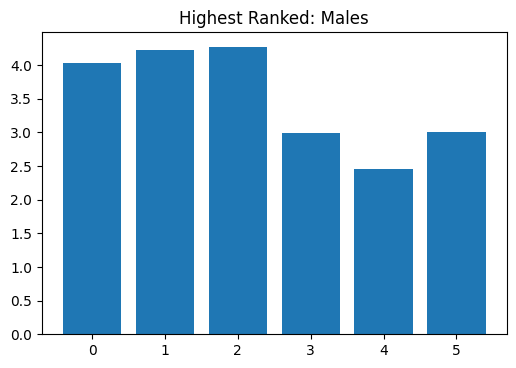

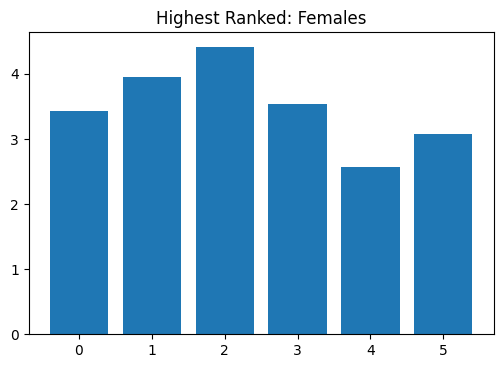

In [24]:
# Redo highest ranked for males and females
plt.bar(range(6), males[males.columns[9:15]].mean())
plt.title("Highest Ranked: Males")
plt.show()

plt.bar(range(6), females[females.columns[9:15]].mean())
plt.title("Highest Ranked: Females")
plt.show()

Most males and females rated the 5th movie the best and the third movie the worst. On average, the men rated the second movie the second worst than the women.

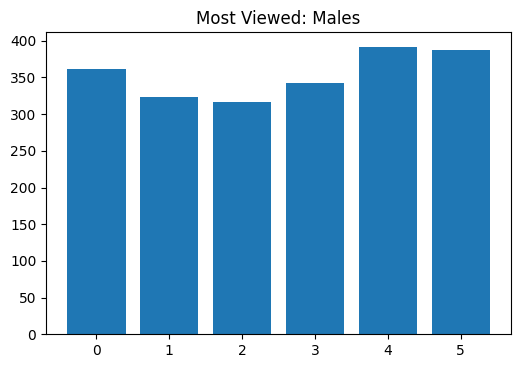

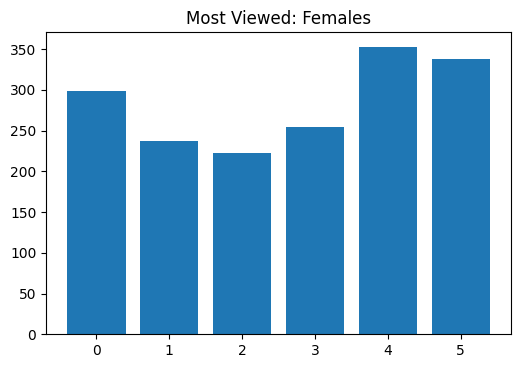

In [25]:
# Redo most viewed for males and females
plt.bar(range(6), males[males.columns[3:9]].sum())
plt. title("Most Viewed: Males")
plt.show()

plt.bar(range(6), females[females.columns[3:9]].sum())
plt. title("Most Viewed: Females")
plt.show()

The 5th movie was the most viewed for men and women. The third movie was watched significantly less than men did. Interestingly, more males watches episodes 1-3, but males liked them far less than females did.